<a href="https://colab.research.google.com/github/PavankumarUppar/AML/blob/main/Program6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

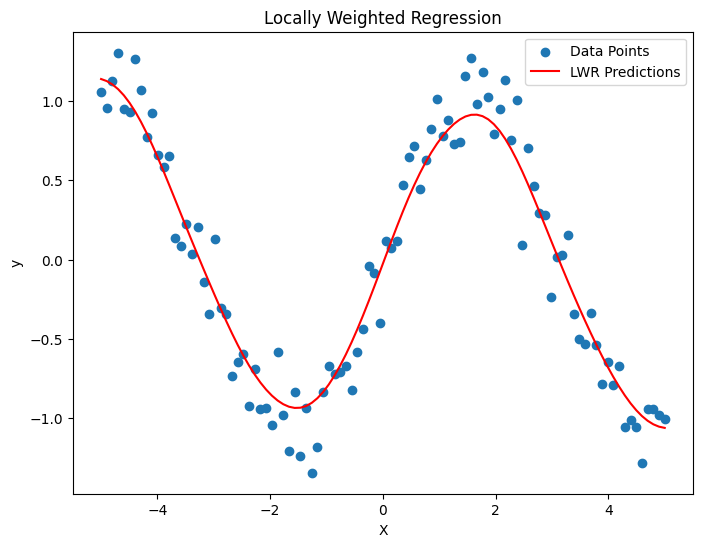

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = np.sin(X) + np.random.normal(0, 0.2, X.shape[0])

# Locally Weighted Regression algorithm
def LWR(test_point, X, y, tau):
    # Add bias term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights as an identity matrix
    weights = np.eye(X.shape[0])
    
    # Calculate weights based on proximity to test_point
    for i in range(X.shape[0]):
        weights[i, i] = np.exp(-(X[i] - test_point)**2 / (2 * tau**2))
    
    # Calculate weighted linear regression coefficients
    theta = np.linalg.inv(X_bias.T @ weights @ X_bias) @ X_bias.T @ weights @ y
    
    # Predict the value at test_point
    test_point_bias = np.array([1, test_point])
    y_pred = test_point_bias @ theta
    
    return y_pred

# Set the bandwidth parameter tau
tau = 0.5

# Generate predictions using LWR for each test point
X_test = np.linspace(-5, 5, 100)
y_pred = [LWR(test_point, X, y, tau) for test_point in X_test]

# Plot the original data and the LWR predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X_test, y_pred, color='red', label='LWR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()